In [3]:
# --- Data Loading and Preprocessing ---
import pandas as pd
import numpy as np

# Load the data from text files
train_data = np.loadtxt('Training.txt')
test_data = np.loadtxt('Test.txt')

# Separate features and labels
X_train = train_data[:, 1:]  # Features: intensity and symmetry
y_train = train_data[:, 0]   # Target: digit

X_test = test_data[:, 1:]    # Features: intensity and symmetry
y_test = test_data[:, 0]     # Target: digit

# Display the first few rows of the training data
print("Training Data (first 5 rows):")
print(pd.DataFrame(train_data, columns=["Digit", "Intensity", "Symmetry"]).head())

# Check the shape of the data
print("\nShape of Training Data:", X_train.shape)
print("Shape of Test Data:", X_test.shape)


Training Data (first 5 rows):
   Digit  Intensity  Symmetry
0    6.0   0.341092 -4.528937
1    5.0   0.444131 -5.496812
2    4.0   0.231002 -2.886750
3    7.0   0.200275 -3.534375
4    3.0   0.291936 -4.352062

Shape of Training Data: (7291, 2)
Shape of Test Data: (2007, 2)


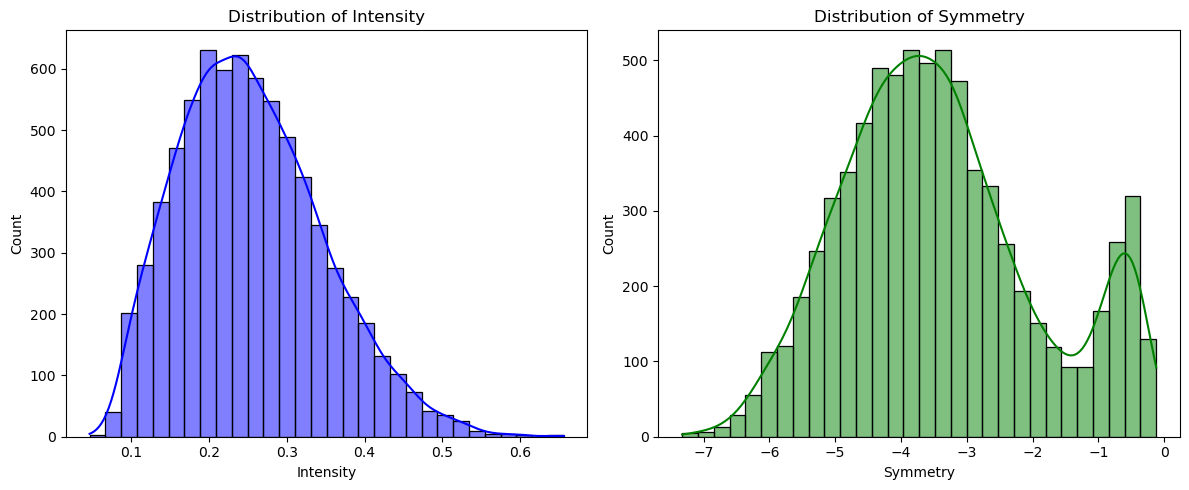

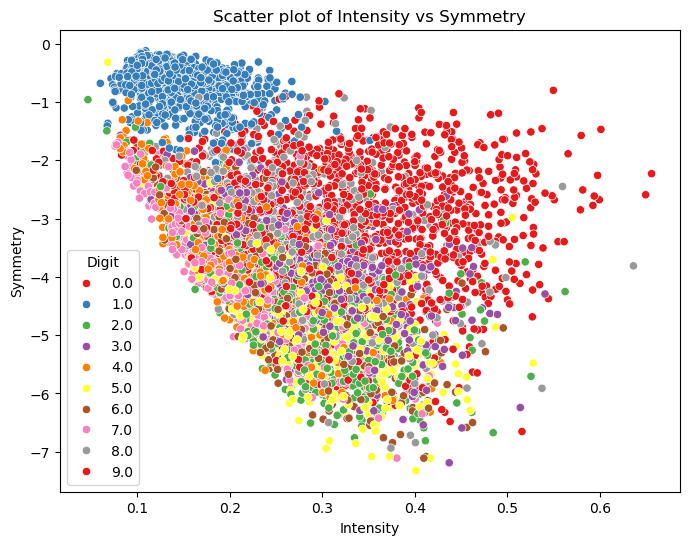

/var/folders/xh/7ttk1jwj5k13wrttw2xcvn8m0000gn/T/ipykernel_30834/2377364549.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Digit', data=df_train, palette='Set1')


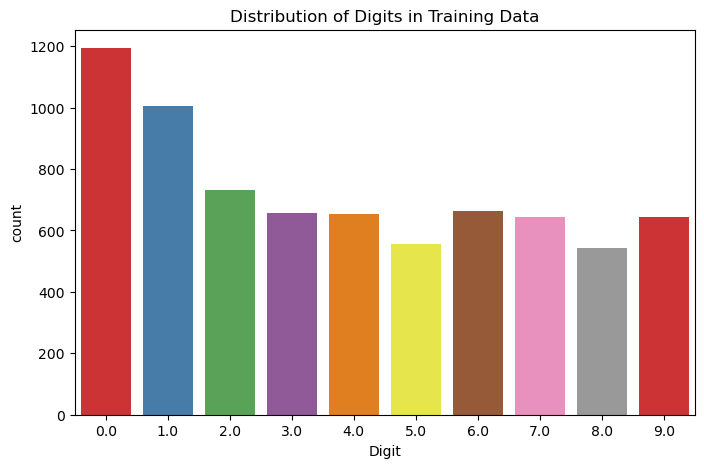

In [6]:
# --- Exploratory Data Analysis, Data Visualization ---
import matplotlib.pyplot as plt
import seaborn as sns

# Convert data to DataFrame for easier plotting
df_train = pd.DataFrame(train_data, columns=["Digit", "Intensity", "Symmetry"])

# Plot histograms for Intensity and Symmetry
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_train['Intensity'], kde=True, bins=30, color='blue')
plt.title('Distribution of Intensity')

plt.subplot(1, 2, 2)
sns.histplot(df_train['Symmetry'], kde=True, bins=30, color='green')
plt.title('Distribution of Symmetry')

plt.tight_layout()
plt.show()

# Scatter plot to visualize the relationship between Intensity and Symmetry
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Intensity', y='Symmetry', hue='Digit', palette='Set1', data=df_train)
plt.title('Scatter plot of Intensity vs Symmetry')
plt.show()
# Plot the distribution of the target variable (Digit)
plt.figure(figsize=(8, 5))
sns.countplot(x='Digit', data=df_train, palette='Set1')
plt.title('Distribution of Digits in Training Data')
plt.show()



Feature Distribution:
The Intensity feature appears to have a normal distribution centered around 0.3.
The Symmetry feature is more skewed, with a wider spread.

Scatter Plot:
The scatter plot of Intensity vs. Symmetry shows that some digits are more easily separable based on these two features (e.g., digit 1), while others overlap significantly.

Class Distribution:
The digit classes are not perfectly balanced, with digit 0 being more frequent than others. This could impact the model performance.

# SVM Implementation

Training Polynomial Kernel SVM...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Current fold accuracy: 0.38313913639479097
Current fold accuracy: 0.3998628257887517
Current fold accuracy: 0.39849108367626884
Current fold accuracy: 0.29766803840877915
Current fold accuracy: 0.3058984910836763
Current fold accuracy: 0.3017832647462277
Current fold accuracy: 0.3004115226337449
Current fold accuracy: 0.2988348183687457
Current fold accuracy: 0.39746227709190673
[CV] END ..............C=0.1, coef0=0, degree=3, kernel=poly; total time=   0.7s
Current fold accuracy: 0.40099434253385907
[CV] END ..............C=0.1, coef0=0, degree=3, kernel=poly; total time=   0.7s
Current fold accuracy: 0.3175038573632779
[CV] END ..............C=0.1, coef0=0, degree=2, kernel=poly; total time=   0.8s
Current fold accuracy: 0.2993313903651637
[CV] END ..............C=0.1, coef0=0, degree=2, kernel=poly; total time=   0.8s
Current fold accuracy: 0.384707697582719
[CV] END ..............C=0.1, 

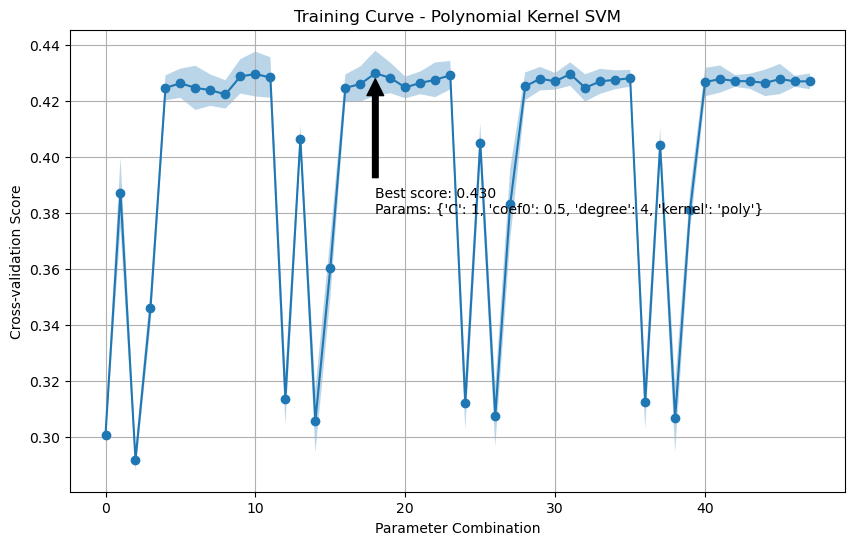

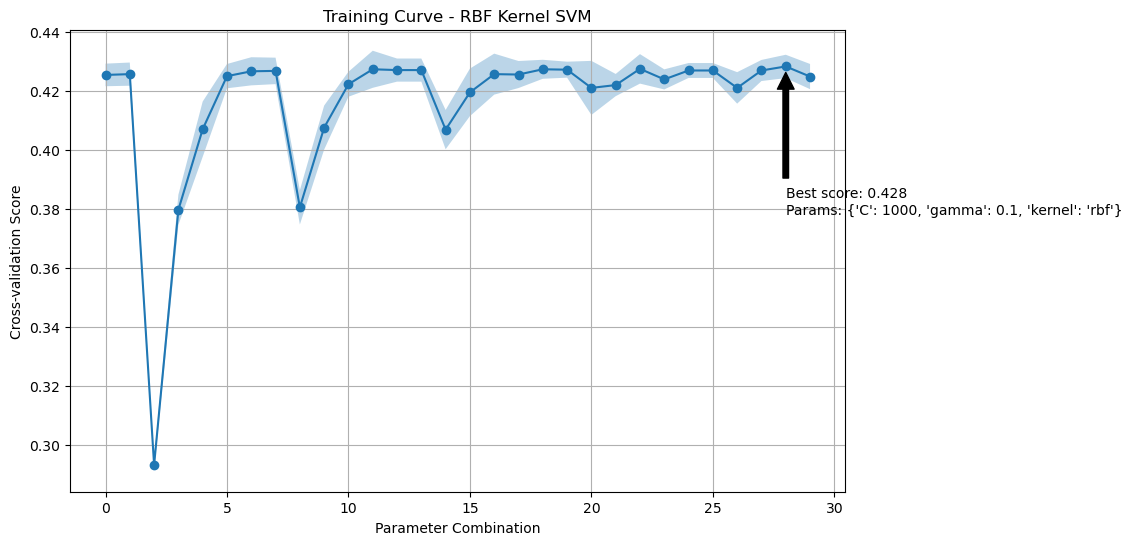


Polynomial Kernel SVM Results:
Best Parameters: {'C': 1, 'coef0': 0.5, 'degree': 4, 'kernel': 'poly'}
Best Cross-validation Score: 0.4299835184103963
Test Accuracy: 0.3996013951170902
              precision    recall  f1-score   support

         0.0       0.58      0.83      0.68       359
         1.0       0.95      0.90      0.92       264
         2.0       0.19      0.39      0.25       198
         3.0       0.16      0.21      0.18       166
         4.0       0.14      0.01      0.02       200
         5.0       0.20      0.01      0.01       160
         6.0       0.18      0.08      0.11       170
         7.0       0.30      0.49      0.37       147
         8.0       0.33      0.01      0.02       166
         9.0       0.24      0.36      0.29       177

    accuracy                           0.40      2007
   macro avg       0.33      0.33      0.29      2007
weighted avg       0.37      0.40      0.35      2007


RBF Kernel SVM Results:
Best Parameters: {'C': 1000, 'g

In [2]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, make_scorer
import matplotlib.pyplot as plt

def custom_score(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Current fold accuracy: {accuracy}")
    return accuracy

custom_scorer = make_scorer(custom_score)

def plot_training_curve(grid_result, title):
    mean_scores = grid_result.cv_results_['mean_test_score']
    std_scores = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    
    plt.figure(figsize=(10, 6))
    plt.title(f"Training Curve - {title}")
    plt.xlabel("Parameter Combination")
    plt.ylabel("Cross-validation Score")
    plt.plot(range(len(mean_scores)), mean_scores, 'o-')
    plt.fill_between(range(len(mean_scores)), mean_scores - std_scores, mean_scores + std_scores, alpha=0.3)
    plt.grid(True)
    
    # Annotate best score
    best_index = np.argmax(mean_scores)
    best_score = mean_scores[best_index]
    best_param = params[best_index]
    plt.annotate(f'Best score: {best_score:.3f}\nParams: {best_param}', 
                 xy=(best_index, best_score), xytext=(best_index, best_score-0.05),
                 arrowprops=dict(facecolor='black', shrink=0.05))
    
    plt.show()

# Load the data
train_data = np.loadtxt('Training.txt')
test_data = np.loadtxt('Test.txt')

# Separate features and labels
X_train = train_data[:, 1:]  # Features: intensity and symmetry
y_train = train_data[:, 0]   # Target: digit
X_test = test_data[:, 1:]    # Features: intensity and symmetry
y_test = test_data[:, 0]     # Target: digit

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Set up the parameter grid for polynomial kernel
param_grid_poly = {
    'C': [0.1, 1, 10, 100],
    'degree': [2, 3, 4, 5],
    'coef0': [0, 0.5, 1],
    'kernel': ['poly']
}

# Set up the parameter grid for RBF kernel
param_grid_rbf = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']
}

# Create a GridSearchCV object for both kernels with custom scorer and verbose output
svm_poly = GridSearchCV(SVC(), param_grid_poly, cv=5, scoring=custom_scorer, verbose=2, n_jobs=-1, return_train_score=True)
svm_rbf = GridSearchCV(SVC(), param_grid_rbf, cv=5, scoring=custom_scorer, verbose=2, n_jobs=-1, return_train_score=True)

# Train the SVM models
print("Training Polynomial Kernel SVM...")
svm_poly.fit(X_train_scaled, y_train)

print("\nTraining RBF Kernel SVM...")
svm_rbf.fit(X_train_scaled, y_train)

# Plot training curves
plot_training_curve(svm_poly, "Polynomial Kernel SVM")
plot_training_curve(svm_rbf, "RBF Kernel SVM")

# Predict and evaluate the polynomial kernel model
y_pred_poly = svm_poly.predict(X_test_scaled)
print("\nPolynomial Kernel SVM Results:")
print("Best Parameters:", svm_poly.best_params_)
print("Best Cross-validation Score:", svm_poly.best_score_)
print("Test Accuracy:", accuracy_score(y_test, y_pred_poly))
print(classification_report(y_test, y_pred_poly))

# Predict and evaluate the RBF kernel model
y_pred_rbf = svm_rbf.predict(X_test_scaled)
print("\nRBF Kernel SVM Results:")
print("Best Parameters:", svm_rbf.best_params_)
print("Best Cross-validation Score:", svm_rbf.best_score_)
print("Test Accuracy:", accuracy_score(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))

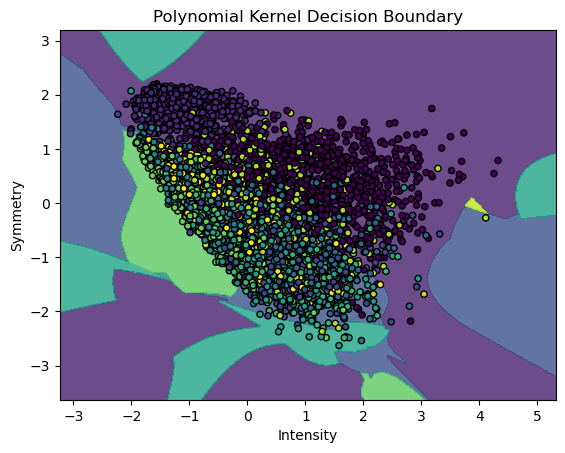

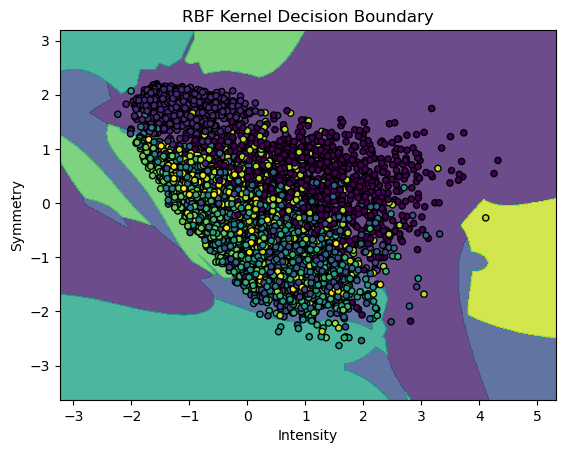

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

def plot_decision_boundaries(X, y, model, title):
    # Create a mesh to plot the decision boundaries
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict classes for each point in the mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=20)
    plt.title(title)
    plt.xlabel('Intensity')
    plt.ylabel('Symmetry')
    plt.show()

# Plot decision boundaries for the best polynomial kernel model
plot_decision_boundaries(X_train_scaled, y_train, svm_poly.best_estimator_, 'Polynomial Kernel Decision Boundary')

# Plot decision boundaries for the best RBF kernel model
plot_decision_boundaries(X_train_scaled, y_train, svm_rbf.best_estimator_, 'RBF Kernel Decision Boundary')


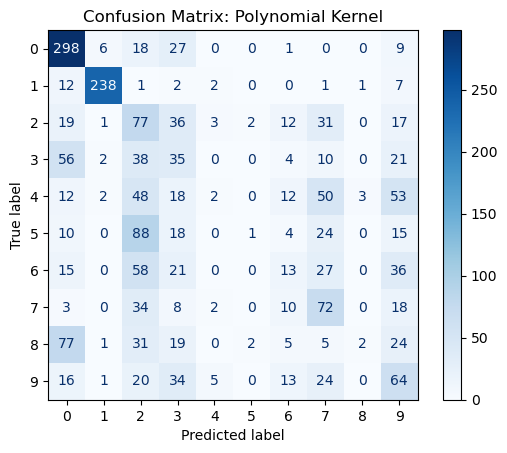

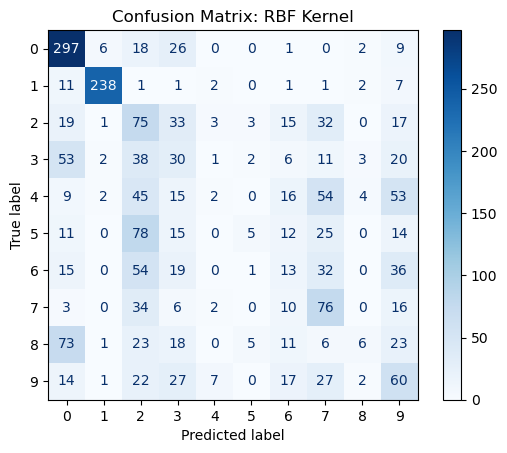

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix for Polynomial Kernel
cm_poly = confusion_matrix(y_test, y_pred_poly)
ConfusionMatrixDisplay(cm_poly, display_labels=range(10)).plot(cmap='Blues')
plt.title('Confusion Matrix: Polynomial Kernel')
plt.show()

# Confusion matrix for RBF Kernel
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
ConfusionMatrixDisplay(cm_rbf, display_labels=range(10)).plot(cmap='Blues')
plt.title('Confusion Matrix: RBF Kernel')
plt.show()
